In [1]:
import os
os.chdir(r'/Users/ryanmccrickerd/desktop/rypy')

In [2]:
import numpy as np
import pandas as pd
import rypy as rp
from matplotlib import pyplot as plt
from scipy.stats import norm
import mpl
% matplotlib inline

In [3]:
nx = np.newaxis
mpl.config(scale=1.5,print_keys=False)

In [20]:
ξ0 = 0.16**2
ξ1 = 0.22**2
α,β,ρ = 0.001,256/16,-0.
θ = ξ0,ξ1,α,β,ρ

In [21]:
T = np.array([1])[:,nx]
M = ['1Y']
Δ = np.linspace(1,99,21)[nx,:]/100
k = norm.ppf(Δ)*0.20*np.sqrt(T)

In [22]:
pd.DataFrame(k,index=M,columns=Δ[0,:])

,0.01,0.059,0.108,0.157,0.206,0.255,0.304,0.353,0.402,0.451,...,0.549,0.598,0.647,0.696,0.745,0.794,0.843,0.892,0.941,0.99
1Y,-0.46527,-0.312645,-0.247447,-0.201373,-0.164076,-0.131768,-0.102586,-0.075447,-0.049635,-0.024627,...,0.024627,0.049635,0.075447,0.102586,0.131768,0.164076,0.201373,0.247447,0.312645,0.46527


In [23]:
C = rp.pricer(T,k,θ)

In [24]:
BSV = rp.surface(T,k,C)

In [25]:
pd.DataFrame(BSV,index=M,columns=Δ[0,:])

,0.01,0.059,0.108,0.157,0.206,0.255,0.304,0.353,0.402,0.451,...,0.549,0.598,0.647,0.696,0.745,0.794,0.843,0.892,0.941,0.99
1Y,0.198012,0.19801,0.19801,0.19801,0.198009,0.198009,0.198009,0.198009,0.198009,0.198009,...,0.198009,0.198009,0.198009,0.198009,0.198009,0.198009,0.19801,0.19801,0.19801,0.198012


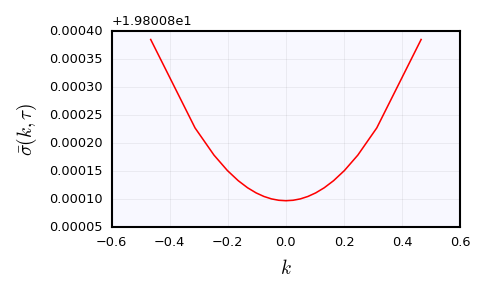

In [26]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(k[i,:],100*BSV[i,:])
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,\tau)$')
#     axes.set_ylim([15,25])

In [27]:
np.mean(BSV)

0.19800958015896594